   ## PML MICRO PROJECT
 
## CLASSIFICATION OF ZOO ANIMALS
 
 ### Code Library Set-Up


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree




In [34]:
#Load the data
zoo = pd.read_csv('zoo.csv')
class_df = pd.read_csv('class.csv')


In [35]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [36]:
zoo['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [37]:
class_df.head(7)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [38]:
class_df['Class_Type'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

In [39]:
zoo.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [40]:
class_df.columns

Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')

In [41]:
zoo.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [42]:
class_df.dtypes

Class_Number                          int64
Number_Of_Animal_Species_In_Class     int64
Class_Type                           object
Animal_Names                         object
dtype: object

In [43]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [44]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [45]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [46]:
class_df.describe()

,Class_Number,Number_Of_Animal_Species_In_Class
count,7.000000,7.000000
mean,4.000000,14.428571
std,2.160247,12.895182
min,1.000000,4.000000
25%,2.500000,6.500000
50%,4.000000,10.000000
75%,5.500000,16.500000
max,7.000000,41.000000


In [47]:
#Combine the zoo and the class files
zoo = zoo.merge(class_df,how='left',left_on='class_type',right_on='Class_Number')


### Brief Exploratory Analysis

In [48]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [49]:
print(zoo.columns)

print(zoo['animal_name'].unique() )

print(zoo['Class_Type'].unique() )


Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type',
       'Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' '

### Visualization of data

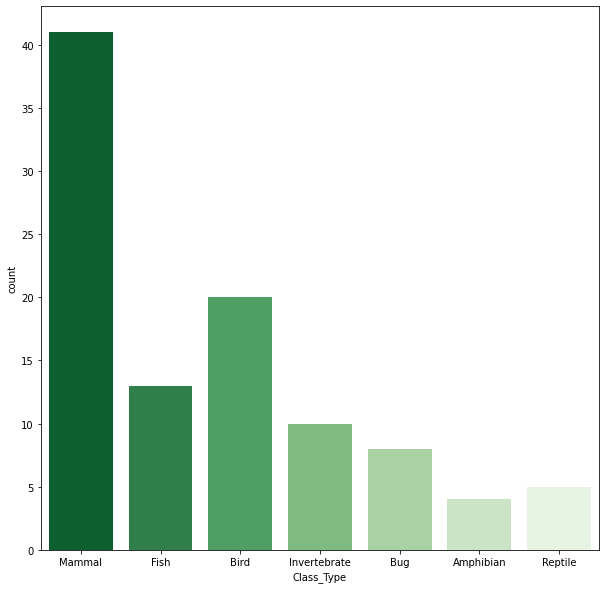

In [50]:
plt.figure(figsize=(10,10))
sns.light_palette("seagreen", as_cmap=True)
fig = sns.countplot(x=zoo['Class_Type'],label="Count", palette = "Greens_r")
fig = fig.get_figure()

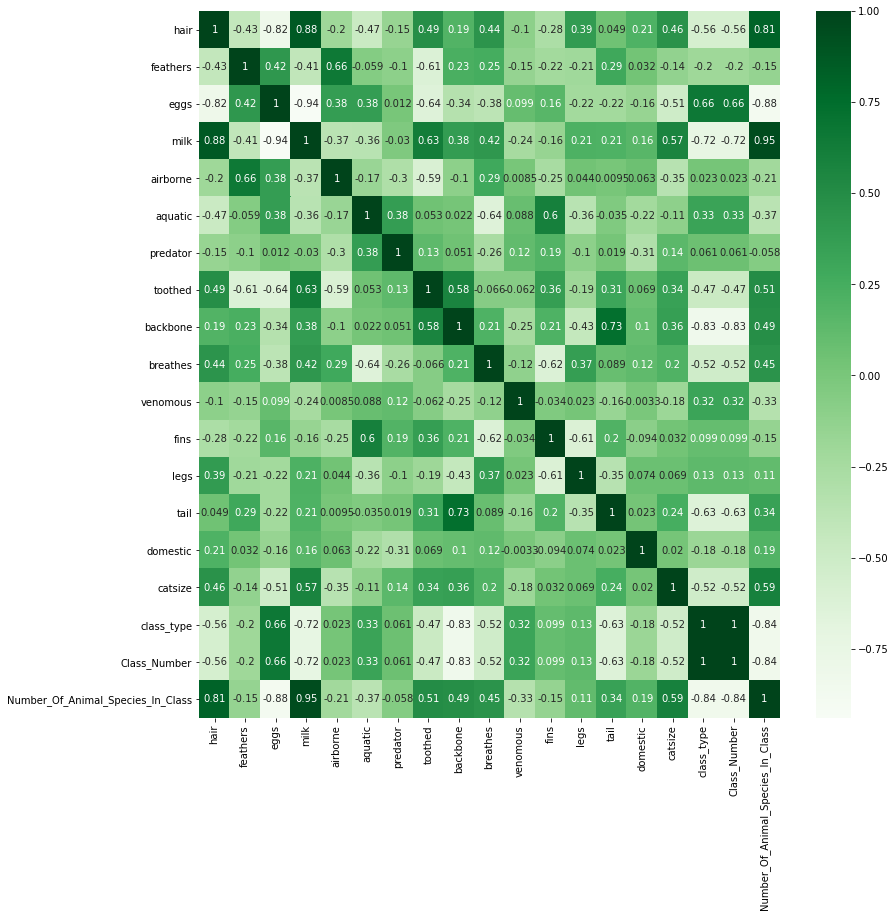

In [51]:
#run a correlation plot on all our feautres and see if any arise.

plt.figure(figsize=(13,13))
corr = zoo.iloc[:,1:-1].corr()
sns.heatmap(corr, cmap = "Greens", annot=True)
plt.show()


### Test Splitting

In [52]:
# Remove unwanted columns, and assign the x and y values
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

X = zoo[features]
y = zoo['Class_Number']


In [53]:
X_train,X_test,y_train,y_text = train_test_split(X,y , test_size = 0.25, random_state = 42)

### K-Nearest Neighbors

In [104]:
#Implement KNN
X = zoo[features]
y = zoo['Class_Number']
X_train,X_test,y_train,y_text = train_test_split(X,y , test_size = 0.25, random_state = 42)


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_train)
print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))


Accuracy: 0.9333333333333333


## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X = zoo[features]
y = zoo['Class_Number']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)

lor = LogisticRegression(penalty='l2', C=10.0)
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)

accuracy_score(y_test,y_pred)

0.9615384615384616

## svm

In [109]:
X = zoo[features]
y = zoo['Class_Number']

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Declare the model
svm = SVC(kernel='linear', C=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)

# Train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Get Accuracy Score
accuracy_score(y_pred_svm,y_test)

0.8846153846153846

## Decision tree

Accuracy: 0.2692307692307692


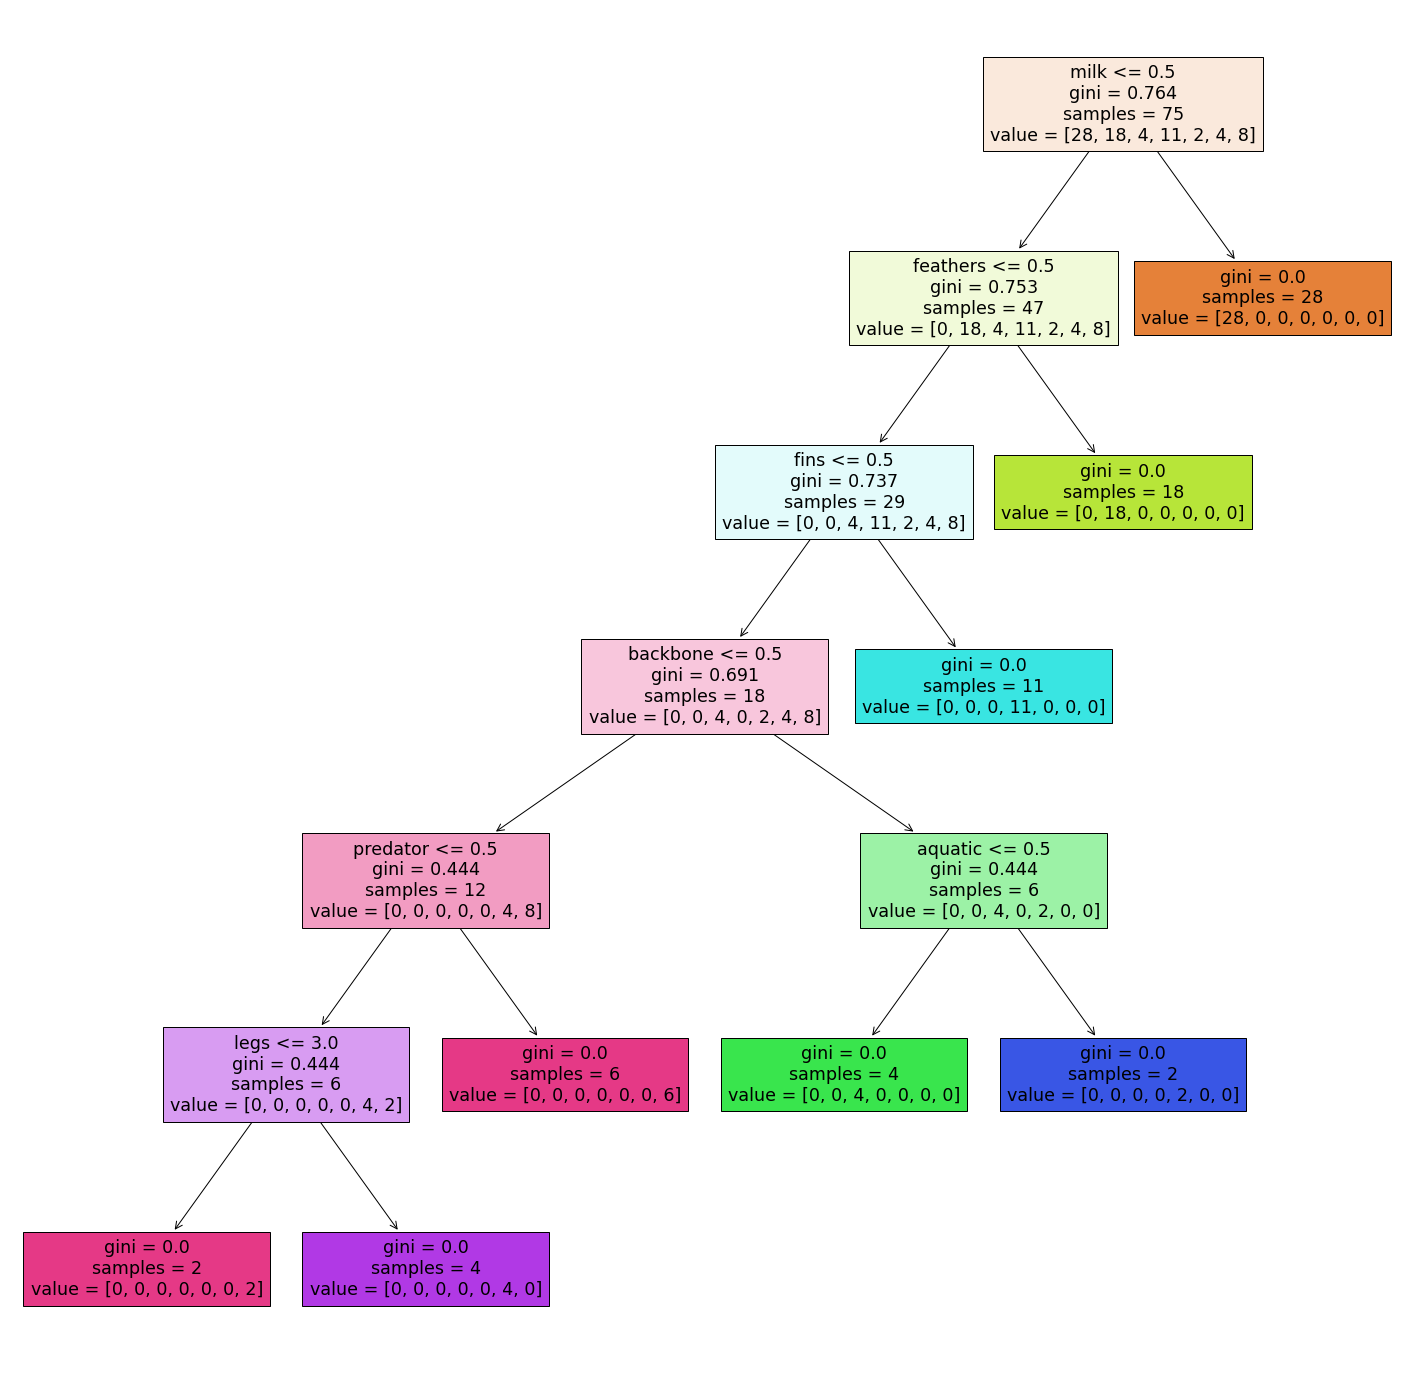

In [119]:
dec = DecisionTreeClassifier(random_state=1)
dec = dec.fit(X_train,y_train)
pred = dec.predict(X_test)

plt.figure(figsize=(25,25))
df= tree.plot_tree(dec,feature_names = features,filled = True)

print("Accuracy: " + str(accuracy_score(val_y,pred)))


###  Logistic Regression is selected as a best model

In [110]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X  = zoo[features]
y = zoo['Class_Number']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)

lor = LogisticRegression(penalty='l2', C=10.0)
lor.fit(X2_train, y2_train)
y2_pred = lor.predict(X2_test)



In [112]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix

accuracy_score: 0.9615384615384616


<AxesSubplot:>

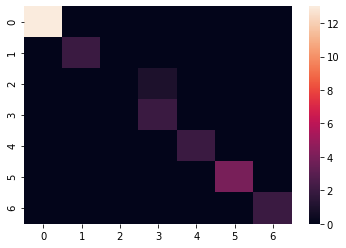

In [113]:
print('accuracy_score:', accuracy_score(y_pred, y_test))

confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(data = confusion_matrix)

In [114]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9615384615384616


In [115]:
print("Recall:", recall_score(y_test, y_pred, average='micro'))

Recall: 0.9615384615384616


In [116]:
print("Precision:", precision_score(y_test, y_pred, average='micro'))

Precision: 0.9615384615384616
